In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
pd.set_option('max_columns', None)

In [3]:
# Reading the data
houses=pd.read_csv('kc_house_data.csv', parse_dates=['date'])

In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [5]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


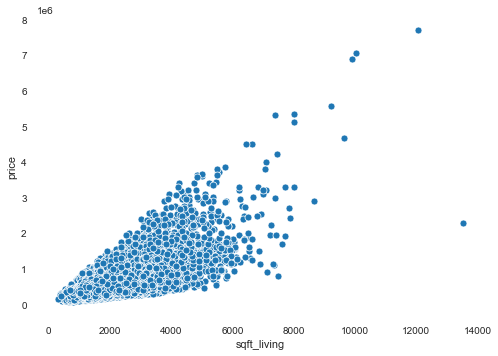

In [6]:
sns.scatterplot(x='sqft_living', y='price', data=houses)

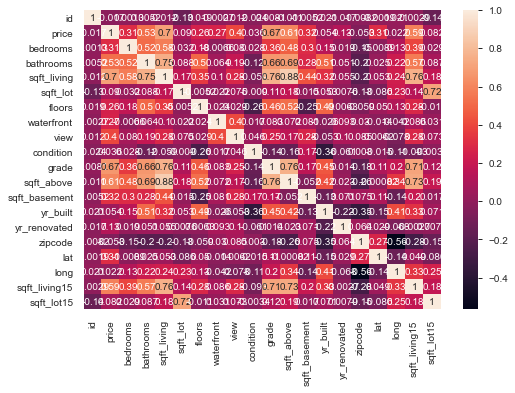

In [7]:
sns.heatmap(houses.corr(), annot=True)

In [4]:
X=houses.drop(['price', 'id', 'date'], axis=1)

In [5]:
y=houses['price']

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [7]:
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
print(f"Multiple Linear Regression coeff: {regressor.coef_}")
print(f"Multiple Linear Regression Constant: {regressor.intercept_}")

Multiple Linear Regression coeff: [-3.39983384e+04  4.38841587e+04  1.08697127e+02  9.88020923e-02
  5.61559511e+03  5.54806822e+05  5.46605403e+04  2.35947805e+04
  9.43881397e+04  7.05259181e+01  3.81712092e+01 -2.64550139e+03
  2.25418962e+01 -5.51968274e+02  5.96472793e+05 -1.96037123e+05
  2.02869745e+01 -3.45405934e-01]
Multiple Linear Regression Constant: 6353452.423528142


In [9]:
X.shape

(21613, 18)

In [10]:
y_predict=regressor.predict(X_test)

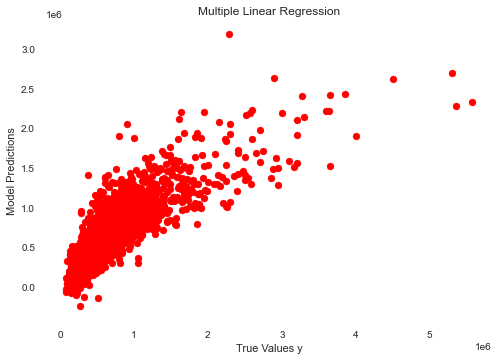

In [16]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [11]:
n=len(X_test)
n

5404

In [12]:
k=X_test.shape[1]
k

18

In [13]:
r2=r2_score(y_test, y_predict)
r2

0.7048466077761673

In [14]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.7038600226211016

In [15]:
# Ridge 
regressor_ridge=Ridge(alpha=50)
regressor_ridge.fit(X_train, y_train)

Ridge(alpha=50)

In [16]:
print(f'Coeff:{regressor_ridge.coef_}')
print(f'Constant:{regressor_ridge.intercept_}')

Coeff:[-3.54004338e+04  4.42271567e+04  1.09640223e+02  6.73638775e-02
  9.84618201e+03  3.63933046e+05  6.10232687e+04  2.23243719e+04
  9.72233800e+04  6.80726117e+01  4.15675906e+01 -2.81366679e+03
  2.31125635e+01 -4.50712676e+02  4.98632796e+05 -1.48290405e+05
  1.94655825e+01 -3.71258488e-01]
Constant:7226594.79979135


In [17]:
y_predict=regressor_ridge.predict(X_test)

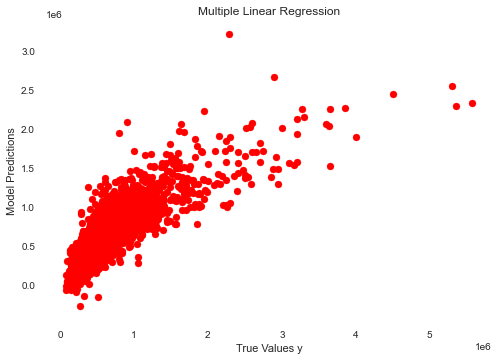

In [53]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [18]:
n=len(X_test)
n

5404

In [19]:
k=X_test.shape[1]
k

18

In [20]:
r2=r2_score(y_test, y_predict)
r2

0.6990277921825939

In [21]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.6980217569475498

In [22]:
# Lasso
regressor_lasso=Lasso(alpha=500)
regressor_lasso.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299888661130724.6, tolerance: 210410096861.09872
  positive)


Lasso(alpha=500)

In [23]:
print(f'Coeff:{regressor_lasso.coef_}')
print(f'Constant:{regressor_lasso.intercept_}')

Coeff:[-3.35240776e+04  4.23678115e+04  2.79688154e+02  7.75818985e-02
  5.29378340e+03  4.73890988e+05  5.72005697e+04  2.17946354e+04
  9.56432059e+04 -1.00250227e+02 -1.29964381e+02 -2.71612525e+03
  2.30652559e+01 -4.82859565e+02  5.64093000e+05 -1.49972112e+05
  1.86801503e+01 -3.68453597e-01]
Constant:6885548.901136032


In [24]:
y_predict=regressor_lasso.predict(X_test)

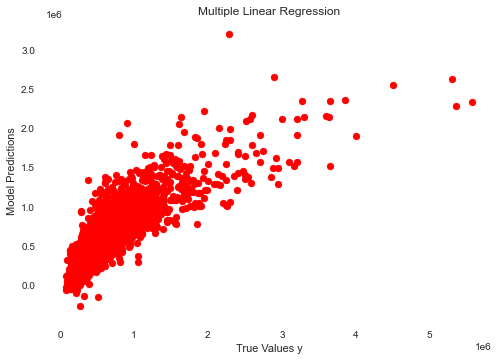

In [34]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [25]:
n=len(X_test)
n

5404

In [36]:
k=X_test.shape[1]
k

18

In [26]:
r2=r2_score(y_test, y_predict)
r2

0.7026453026315159

In [27]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.701651359353404

In [ ]:
regressor_lasso.n_features_in

In [4]:
X=houses.drop(['price', 'id', 'date'], axis=1)
y=houses['price']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [5]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
print(f'Linear Model Coeff m:{lin_reg.coef_}')
print(f'Linear Model Coeff c:{lin_reg.intercept_}')

Linear Model Coeff m:[-3.39983384e+04  4.38841587e+04  1.08697127e+02  9.88020923e-02
  5.61559511e+03  5.54806822e+05  5.46605403e+04  2.35947805e+04
  9.43881397e+04  7.05259181e+01  3.81712092e+01 -2.64550139e+03
  2.25418962e+01 -5.51968274e+02  5.96472793e+05 -1.96037123e+05
  2.02869745e+01 -3.45405934e-01]
Linear Model Coeff c:6353452.423528142


In [6]:
y_predict_lin_reg=lin_reg.predict(X_test)

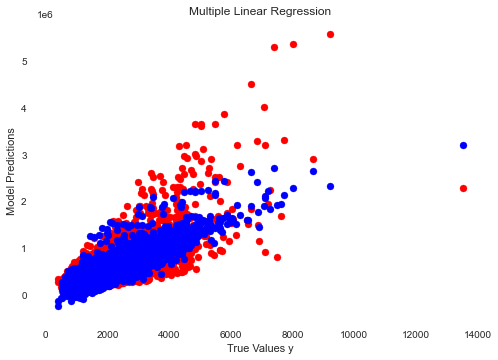

In [7]:
plt.scatter(X_test['sqft_living'],y_test, color='red')
plt.scatter(X_test['sqft_living'],y_predict_lin_reg, color='blue')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_column_train=poly.fit_transform(X_train)
regressor=LinearRegression()
regressor.fit(X_column_train,y_train)

LinearRegression()

In [9]:
print(f'Polynomial Reg Coeff: {regressor.coef_}')
print(f'Polynomial Reg Constant: {regressor.intercept_}')

Polynomial Reg Coeff: [ 8.42828573e+01  1.24532725e+07 -1.12947512e+07 -3.04366058e+04
 -3.85925038e+02 -2.51544283e+07  7.14021775e+07  1.92927786e+06
  7.89070768e+05 -1.57076468e+07  6.46188856e+04  8.12917677e+03
 -1.84248762e+05  2.46386051e+04 -4.77389300e+05  1.21964226e+08
  2.72654302e+07 -1.25255005e+04  7.39119448e+02  6.39879423e+02
 -2.31232742e+03 -5.83314405e+01  1.74691302e-01  2.25548144e+04
 -3.08596811e+04  3.56417123e+02 -1.48952170e+03  4.37378086e+03
  1.81370599e+01  3.80725300e+01 -2.93751930e+02 -1.61520177e+01
 -2.61372517e+01 -3.15908560e+04  6.42327692e+04  2.80227366e+01
 -9.19270677e-02 -2.61854533e+03  2.50245485e+01 -4.49437636e-01
 -3.26386532e+04  3.99983463e+03  1.11908379e+04 -1.37927760e+04
  4.18712572e+03  2.62375791e+01 -3.33071476e+00  2.62794112e+02
 -1.88460045e+01 -3.42006997e+01  4.54041757e+04 -9.82285909e+04
 -1.36910711e+01  3.78390534e-01  5.09387111e+02 -1.26808581e+03
 -2.98419577e+00  8.27095455e+01 -4.85776423e+00  1.09732890e+01
  1

In [10]:
y_predict_poly=regressor.predict(poly.transform(X_test))

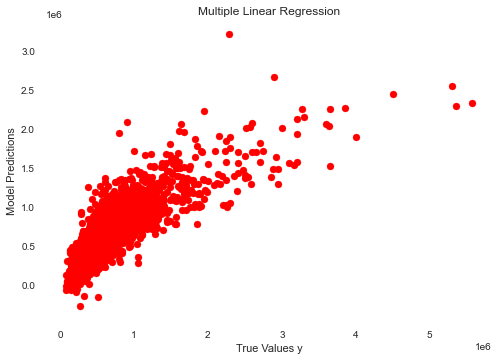

In [74]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

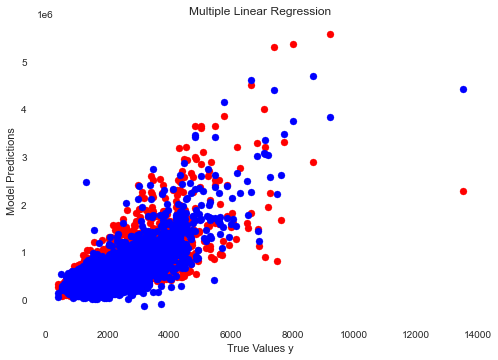

In [11]:
plt.scatter(X_test['sqft_living'],y_test,color='red')
plt.scatter(X_test['sqft_living'],y_predict_poly,color='blue')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [78]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
X_column_train=poly.fit_transform(X_train)
regressor=LinearRegression()
regressor.fit(X_column_train,y_train)

LinearRegression()

In [79]:
print(f'Polynomial Reg Coeff: {regressor.coef_}')
print(f'Polynomial Reg Constant: {regressor.intercept_}')

Polynomial Reg Coeff: [-1.29381675e+02 -6.59573822e+00  2.74321277e+00 ... -2.41464436e-07
 -9.52791623e-09 -3.90798505e-14]
Polynomial Reg Constant: 4313179593.006337


In [80]:
y_predict_poly=regressor.predict(poly.transform(X_test))

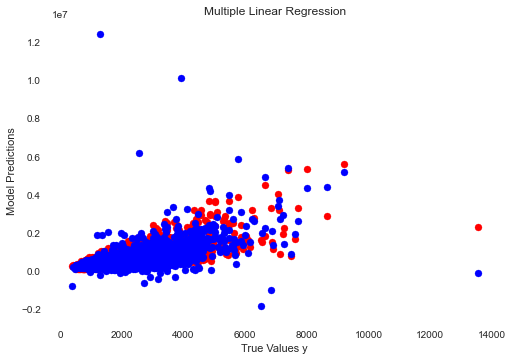

In [81]:
plt.scatter(X_test['sqft_living'],y_test,color='red')
plt.scatter(X_test['sqft_living'],y_predict_poly,color='blue')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [82]:
r2=r2_score(y_test, y_predict)
r2

0.6990277921825938

In [83]:
adj_r2=(1-r2)*(n-1)/(n-k-1)
adj_r2

0.30197824305245047

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)
X_column_train=poly.fit_transform(X_train)
regressor=LinearRegression()
regressor.fit(X_column_train,y_train)

In [ ]:
print(f'Polynomial Reg Coeff: {regressor.coef_}')
print(f'Polynomial Reg Constant: {regressor.intercept_}')

In [64]:
X_test.shape

(5404, 18)

In [65]:
y_test.shape

(5404,)

In [58]:
X_test

array([[ 4.00000e+00,  2.25000e+00,  2.07000e+03, ..., -1.22162e+02,
         2.39000e+03,  7.70000e+03],
       [ 5.00000e+00,  3.00000e+00,  2.90000e+03, ..., -1.22285e+02,
         2.37000e+03,  6.28300e+03],
       [ 4.00000e+00,  2.50000e+00,  3.77000e+03, ..., -1.22129e+02,
         3.71000e+03,  9.68500e+03],
       ...,
       [ 3.00000e+00,  2.50000e+00,  2.07000e+03, ..., -1.22371e+02,
         2.07000e+03,  8.25000e+03],
       [ 4.00000e+00,  2.25000e+00,  4.76000e+03, ..., -1.22285e+02,
         2.95000e+03,  9.32300e+03],
       [ 4.00000e+00,  1.75000e+00,  1.72000e+03, ..., -1.22194e+02,
         1.84000e+03,  8.30000e+03]])

In [59]:
y_test

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
           ...    
11144     650000.0
17803     705000.0
268       272500.0
518      2250000.0
8482      330000.0
Name: price, Length: 5404, dtype: float64